# getting started


*   data source: https://github.com/sartajbhuvaji/brain-tumor-classification-dataset
*   kaggle: https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri?resource=download

In [1]:
print('importing...')
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import os
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import image
print('successful')

importing...
successful


In [2]:
!git clone https://github.com/sartajbhuvaji/brain-tumor-classification-dataset

Cloning into 'brain-tumor-classification-dataset'...
remote: Enumerating objects: 3039, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 3039 (delta 0), reused 0 (delta 0), pack-reused 3035
Receiving objects: 100% (3039/3039), 79.25 MiB | 27.24 MiB/s, done.
Checking out files: 100% (3264/3264), done.


In [3]:
# verify
!ls

brain-tumor-classification-dataset  sample_data


# prepare data

## training data

In [28]:
# link up training data
training_glioma_path = '/content/brain-tumor-classification-dataset/Training/glioma_tumor'
training_meningioma_path = '/content/brain-tumor-classification-dataset/Training/meningioma_tumor'
training_pituitary_path = '/content/brain-tumor-classification-dataset/Training/pituitary_tumor'
training_notumor_path = '/content/brain-tumor-classification-dataset/Training/no_tumor'

# initialize lists
##training_glioma = []
##training_meningioma = []
##training_pituitary = []
##training_notumor = []
all_training_images = []
all_training_labels = []

### glioma

In [29]:
# assign labels
print('initializing glioma training data...')
for item in [f for f in os.listdir(training_glioma_path) if os.path.isfile(os.path.join(training_glioma_path, f))]:
  ##training_glioma.append((os.path.abspath(item),'glioma'))
  ##all_training_images.append(os.path.abspath(item))
  path = '/content/brain-tumor-classification-dataset/Training/glioma_tumor/' + str(os.path.abspath(item))[9:]
  all_training_images.append(np.asarray(Image.open(path)))
  all_training_labels.append(os.path.abspath('glioma'))
print('done')


initializing glioma training data...
done


### meningioma

In [30]:
print('initializing meningioma training data...')
for item in [f for f in os.listdir(training_meningioma_path) if os.path.isfile(os.path.join(training_meningioma_path, f))]:
  ##training_meningioma.append((os.path.abspath(item),'meningioma'))
  ##all_training_images.append(os.path.abspath(item))
  path = '/content/brain-tumor-classification-dataset/Training/meningioma_tumor/' + str(os.path.abspath(item))[9:]
  all_training_images.append(np.asarray(Image.open(path)))
  all_training_labels.append(os.path.abspath('meningioma'))
print('done')


initializing meningioma training data...
done


### pituitary

In [31]:
print('initializing pituitary training data...')
for item in [f for f in os.listdir(training_pituitary_path) if os.path.isfile(os.path.join(training_pituitary_path, f))]:
  ##training_pituitary.append((os.path.abspath(item),'pituitary'))
  ##all_training_images.append(os.path.abspath(item))
  path = '/content/brain-tumor-classification-dataset/Training/pituitary_tumor/' + str(os.path.abspath(item))[9:]
  all_training_images.append(np.asarray(Image.open(path)))
  all_training_labels.append(os.path.abspath('pituitary'))
print('done')


initializing pituitary training data...
done


### no tumor

In [32]:
print('initializing notumor training data...')
for item in [f for f in os.listdir(training_notumor_path) if os.path.isfile(os.path.join(training_notumor_path, f))]:
  ##training_notumor.append((os.path.abspath(item),'notumor'))
  ##all_training_images.append(os.path.abspath(item))
  path = '/content/brain-tumor-classification-dataset/Training/no_tumor/' + str(os.path.abspath(item))[9:]
  all_training_images.append(np.asarray(Image.open(path)))
  all_training_labels.append(os.path.abspath('notumor'))
print('done')


initializing notumor training data...
done


### verify

In [33]:
# verify
##print()
##print(training_glioma[np.random.randint(0,len(training_glioma))])
##print(training_meningioma[np.random.randint(0,len(training_meningioma))])
##print(training_pituitary[np.random.randint(0,len(training_pituitary))])
##print(training_notumor[np.random.randint(0,len(training_notumor))])

print()
print('Do the lists have matching length?',len(all_training_images) == len(all_training_labels))

print()
index = np.random.randint(0,len(all_training_images))
print(all_training_images[index])
print(all_training_labels[index])


Do the lists have matching length? True

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
/content/meningioma


## testing data

In [26]:
# link up testing data
testing_glioma_path = '/content/brain-tumor-classification-dataset/Testing/glioma_tumor'
testing_meningioma_path = '/content/brain-tumor-classification-dataset/Testing/meningioma_tumor'
testing_pituitary_path = '/content/brain-tumor-classification-dataset/Testing/pituitary_tumor'
testing_notumor_path = '/content/brain-tumor-classification-dataset/Testing/no_tumor'

# initialize lists
##testing_glioma = []
##testing_meningioma = []
##testing_pituitary = []
##testing_notumor = []
all_testing_images = []
all_testing_labels = []

# assign labels
print('initializing glioma testing data...')
for item in [f for f in os.listdir(testing_glioma_path) if os.path.isfile(os.path.join(testing_glioma_path, f))]:
  ##testing_glioma.append((os.path.abspath(item),'glioma'))
  ##all_testing_images.append(os.path.abspath(item))
  path = '/content/brain-tumor-classification-dataset/Testing/glioma_tumor/' + str(os.path.abspath(item))[9:]
  all_testing_images.append(np.asarray(Image.open(path)))
  all_testing_labels.append('glioma')
print('done')

print('initializing meningioma testing data...')
for item in [f for f in os.listdir(testing_meningioma_path) if os.path.isfile(os.path.join(testing_meningioma_path, f))]:
  ##testing_meningioma.append((os.path.abspath(item),'meningioma'))
  ##all_testing_images.append(os.path.abspath(item))
  path = '/content/brain-tumor-classification-dataset/Testing/meningioma_tumor/' + str(os.path.abspath(item))[9:]
  all_testing_images.append(np.asarray(Image.open(path)))
  all_testing_labels.append('meningioma')
print('done')

print('initializing pituitary testing data...')
for item in [f for f in os.listdir(testing_pituitary_path) if os.path.isfile(os.path.join(testing_pituitary_path, f))]:
  ##testing_pituitary.append((os.path.abspath(item),'pituitary'))
  ##all_testing_images.append(os.path.abspath(item))
  path = '/content/brain-tumor-classification-dataset/Testing/pituitary_tumor/' + str(os.path.abspath(item))[9:]
  all_testing_images.append(np.asarray(Image.open(path)))
  all_testing_labels.append('pituitary')
print('done')

print('initializing notumor testing data...')
for item in [f for f in os.listdir(testing_notumor_path) if os.path.isfile(os.path.join(testing_notumor_path, f))]:
  ##testing_notumor.append((os.path.abspath(item),'notumor'))
  ##all_testing_images.append(os.path.abspath(item))
  path = '/content/brain-tumor-classification-dataset/Testing/no_tumor/' + str(os.path.abspath(item))[9:]
  all_testing_images.append(np.asarray(Image.open(path)))
  all_testing_labels.append('notumor')
print('done')

# verify
##print()
##print(testing_glioma[np.random.randint(0,len(testing_glioma))])
##print(testing_meningioma[np.random.randint(0,len(testing_meningioma))])
##print(testing_pituitary[np.random.randint(0,len(testing_pituitary))])
##print(testing_notumor[np.random.randint(0,len(testing_notumor))])

print()
print('Do the lists have matching length?',len(all_testing_images) == len(all_testing_labels))

print()
index = np.random.randint(0,len(all_testing_images))
print(all_testing_images[index])
print(all_testing_labels[index])

initializing glioma testing data...
done
initializing meningioma testing data...
done
initializing pituitary testing data...
done
initializing notumor testing data...
done

Do the lists have matching length? True

[[[24 24 24]
  [29 29 29]
  [26 26 26]
  ...
  [37 37 37]
  [38 38 38]
  [38 38 38]]

 [[23 23 23]
  [29 29 29]
  [26 26 26]
  ...
  [35 35 35]
  [36 36 36]
  [36 36 36]]

 [[23 23 23]
  [28 28 28]
  [25 25 25]
  ...
  [35 35 35]
  [36 36 36]
  [36 36 36]]

 ...

 [[18 18 18]
  [20 20 20]
  [22 22 22]
  ...
  [31 31 31]
  [33 33 33]
  [34 34 34]]

 [[18 18 18]
  [20 20 20]
  [22 22 22]
  ...
  [31 31 31]
  [33 33 33]
  [34 34 34]]

 [[18 18 18]
  [20 20 20]
  [22 22 22]
  ...
  [31 31 31]
  [33 33 33]
  [34 34 34]]]
meningioma


## verify


*   lines concerning training images and labels are commented out fo now, until I can solve the RAM problem
*   procedures are tested and perfected using the testing data for now



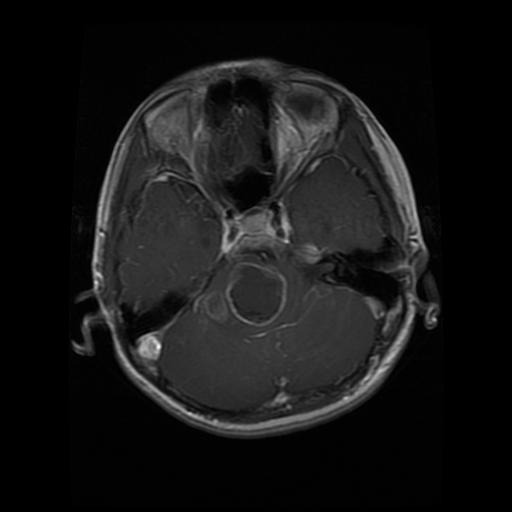

In [35]:
# massage data into suitable form
(train_images, train_labels) = all_training_images, all_training_labels
(test_images, test_labels) = all_testing_images, all_testing_labels

# normalize
##train_images = train_images / 255.0
##test_images = test_images / 255.0

# verify
##print(train_images, train_labels)
##print(test_images, test_labels)

test = Image.fromarray(all_training_images[0])
test

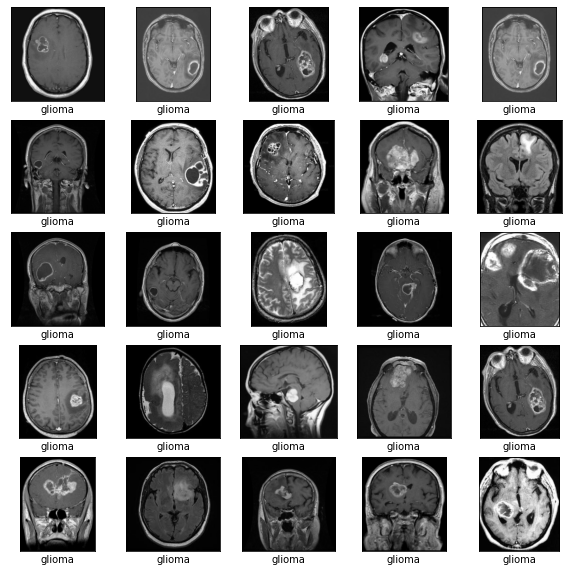

In [36]:
# class names
class_names = ['glioma', 'meningioma', 'pituitary', 'notumor']

# visualize
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    plt.xlabel(test_labels[i])
plt.show()

# Steinbruch

[[[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 ...

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]]


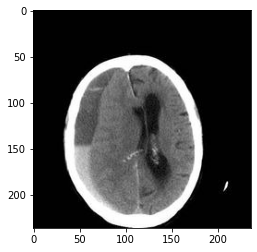

In [23]:
hope = Image.open('/content/brain-tumor-classification-dataset/Testing/no_tumor/image(1).jpg')
#plt.imshow(hope)
hopeconvert = np.asarray(hope)
#print(hopeconvert)
#print(type(hopeconvert))
hopeconvertback = Image.fromarray(hopeconvert)
#plt.imshow(hopeconvertback)

pray = np.asarray(Image.open('/content/brain-tumor-classification-dataset/Testing/no_tumor/image(1).jpg'))
print(pray)
plt.imshow(Image.fromarray(pray))

#test = np.array(Image.open('/content/brain-tumor-classification-dataset/Testing/no_tumor/image(1).jpg').getdata())

#print('test')
#print(test)

#tool = image.imread('/content/brain-tumor-classification-dataset/Testing/no_tumor/image(1).jpg')
#arraytool = np.asarray(tool)

#print('tool')
#print(tool.dtype)
#print(tool.shape)
#print(arraytool)
#plt.imshow(tool)

In [ ]:
# link up training data
training_glioma_path = '/content/brain-tumor-classification-dataset/Training/glioma_tumor'
training_meningioma_path = '/content/brain-tumor-classification-dataset/Training/meningioma_tumor'
training_pituitary_path = '/content/brain-tumor-classification-dataset/Training/pituitary_tumor'
training_notumor_path = '/content/brain-tumor-classification-dataset/Training/no_tumor'

# initialize lists
##training_glioma = []
##training_meningioma = []
##training_pituitary = []
##training_notumor = []
all_training_images = []
all_training_labels = []

# assign labels
print('initializing glioma training data...')
for item in [f for f in os.listdir(training_glioma_path) if os.path.isfile(os.path.join(training_glioma_path, f))]:
  ##training_glioma.append((os.path.abspath(item),'glioma'))
  ##all_training_images.append(os.path.abspath(item))
  path = '/content/brain-tumor-classification-dataset/Training/glioma_tumor/' + str(os.path.abspath(item))[9:]
  all_training_images.append(np.asarray(Image.open(path).getdata()))
  all_training_labels.append(os.path.abspath('glioma'))
print('done')

print('initializing meningioma training data...')
for item in [f for f in os.listdir(training_meningioma_path) if os.path.isfile(os.path.join(training_meningioma_path, f))]:
  ##training_meningioma.append((os.path.abspath(item),'meningioma'))
  ##all_training_images.append(os.path.abspath(item))
  path = '/content/brain-tumor-classification-dataset/Training/meningioma_tumor/' + str(os.path.abspath(item))[9:]
  all_training_images.append(np.asarray(Image.open(path).getdata()))
  all_training_labels.append(os.path.abspath('meningioma'))
print('done')

print('initializing pituitary training data...')
for item in [f for f in os.listdir(training_pituitary_path) if os.path.isfile(os.path.join(training_pituitary_path, f))]:
  ##training_pituitary.append((os.path.abspath(item),'pituitary'))
  ##all_training_images.append(os.path.abspath(item))
  path = '/content/brain-tumor-classification-dataset/Training/pituitary_tumor/' + str(os.path.abspath(item))[9:]
  all_training_images.append(np.asarray(Image.open(path).getdata()))
  all_training_labels.append(os.path.abspath('pituitary'))
print('done')

print('initializing notumor training data...')
for item in [f for f in os.listdir(training_notumor_path) if os.path.isfile(os.path.join(training_notumor_path, f))]:
  ##training_notumor.append((os.path.abspath(item),'notumor'))
  ##all_training_images.append(os.path.abspath(item))
  path = '/content/brain-tumor-classification-dataset/Training/no_tumor/' + str(os.path.abspath(item))[9:]
  all_training_images.append(np.asarray(Image.open(path).getdata()))
  all_training_labels.append(os.path.abspath('notumor'))
print('done')

# verify
##print()
##print(training_glioma[np.random.randint(0,len(training_glioma))])
##print(training_meningioma[np.random.randint(0,len(training_meningioma))])
##print(training_pituitary[np.random.randint(0,len(training_pituitary))])
##print(training_notumor[np.random.randint(0,len(training_notumor))])

print()
print('Do the list have matching length?',len(all_training_images) == len(all_training_labels))

print()
index = np.random.randint(0,len(all_training_images))
print(all_training_images[index])
print(all_training_labels[index])

initializing glioma training data...


KeyboardInterrupt: ignored

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [1 1 1]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [1 1 1]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [1 1 1]
  [1 1 1]
  [2 2 2]]]
<class 'numpy.ndarray'>
(236, 236, 3)
<class 'PIL.Image.Image'>
RGB
(236, 236)


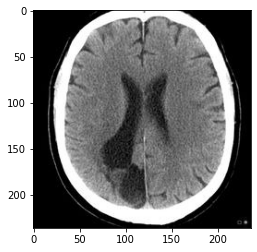

In [10]:
from PIL import Image
from numpy import asarray

# load the image
image = Image.open('/content/brain-tumor-classification-dataset/Testing/no_tumor/image(13).jpg')

# convert image to numpy array
plt.imshow(image)
data = asarray(image)
print(data)

print(type(data))

# summarize shape

print(data.shape)


# create Pillow image

image2 = Image.fromarray(data)

print(type(image2))


# summarize image details

print(image2.mode)

print(image2.size)